In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

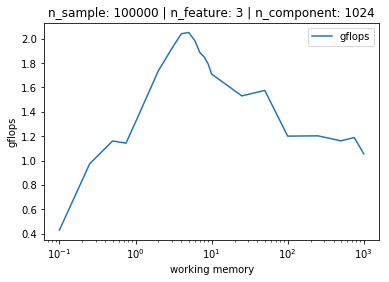

In [31]:
wm = pd.read_csv('bench_p_dist_argmin.csv')
wm.plot(x='wm', y='gflops').set_xscale('log')
plt.xlabel('working memory')
plt.ylabel('gflops')
plt.title('n_sample: 100000 | n_feature: 3 | n_component: 1024')
plt.show()

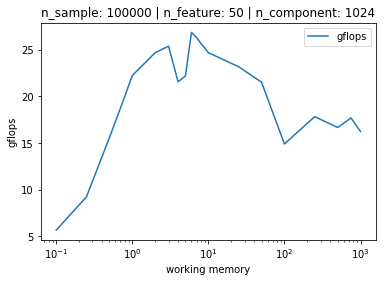

In [32]:
wm50 = pd.read_csv('bench_p_dist_argmin_50.csv')
wm50.plot(x='wm', y='gflops').set_xscale('log')
plt.xlabel('working memory')
plt.ylabel('gflops')
plt.title('n_sample: 100000 | n_feature: 50 | n_component: 1024')
plt.show()

In [110]:
funcs = pd.read_csv('bench_p_dist_funcs.csv')

In [157]:
def compare_component(df, n_sample, n_feature):
    width = 0.25
    d1 = np.array(df.loc[(df['func']=='sgemm') & (df['n_sample']==n_sample) & (df['n_feature']==n_feature)]['gflops'])
    ind1 = np.arange(len(d1)) -(1.5 * width)
    p1 = plt.bar(ind1, d1, width)
    d2 = np.array(df.loc[(df['func']=='matmul') & (df['n_sample']==n_sample) & (df['n_feature']==n_feature)]['gflops'])
    ind2 = ind1 + width
    p2 = plt.bar(ind2, d2, width)
    d3 = np.array(df.loc[(df['func']=='sklearn') & (df['n_sample']==n_sample) & (df['n_feature']==n_feature)]['gflops'])
    ind3 = ind2 + width
    p3 = plt.bar(ind3, d3, width)
    
    plt.ylabel('gflops')
    plt.xlabel('n_component')
    s = 'gflops by n_component (n_sample=' + str(n_sample) + ' & n_feature=' + str(n_feature) +')'
    plt.title(s)
    plt.xticks(ind2, df['n_component'].unique())
    plt.legend((p1[0], p2[0], p3[0]), ('sgemm', 'matmul', 'sklearn'))

    plt.show()

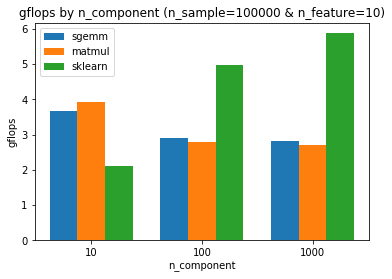

In [158]:
compare_component(funcs, 100000,10)

In [162]:
def compare_feature(df, n_sample, n_component):
    width = 0.25
    d1 = np.array(df.loc[(df['func']=='sgemm') & (df['n_sample']==n_sample) & (df['n_component']==n_component)]['gflops'])
    ind1 = np.arange(len(d1)) -(1.5 * width)
    p1 = plt.bar(ind1, d1, width)
    d2 = np.array(df.loc[(df['func']=='matmul') & (df['n_sample']==n_sample) & (df['n_component']==n_component)]['gflops'])
    ind2 = ind1 + width
    p2 = plt.bar(ind2, d2, width)
    d3 = np.array(df.loc[(df['func']=='sklearn') & (df['n_sample']==n_sample) & (df['n_component']==n_component)]['gflops'])
    ind3 = ind2 + width
    p3 = plt.bar(ind3, d3, width)
    
    plt.ylabel('gflops')
    plt.xlabel('n_feature')
    s = 'gflops by n_feature (n_sample=' + str(n_sample) + ' & n_component=' + str(n_component) +')'
    plt.title(s)
    plt.xticks(ind2, df['n_feature'].unique())
    plt.legend((p1[0], p2[0], p3[0]), ('sgemm', 'matmul', 'sklearn'))

    plt.show()

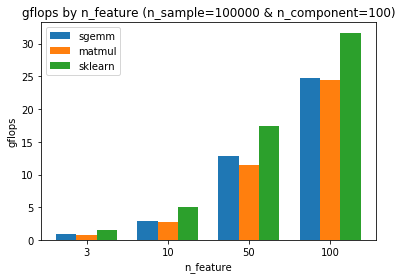

In [138]:
compare_feature(100000,100)

In [163]:
def compare_sample(df, n_feature, n_component):
    width = 0.25
    d1 = np.array(df.loc[(df['func']=='sgemm') & (df['n_feature']==n_feature) & (df['n_component']==n_component)]['gflops'])
    ind1 = np.arange(len(d1)) -(1.5 * width)
    p1 = plt.bar(ind1, d1, width)
    d2 = np.array(df.loc[(df['func']=='matmul') & (df['n_feature']==n_feature) & (df['n_component']==n_component)]['gflops'])
    ind2 = ind1 + width
    p2 = plt.bar(ind2, d2, width)
    d3 = np.array(df.loc[(df['func']=='sklearn') & (df['n_feature']==n_feature) & (df['n_component']==n_component)]['gflops'])
    ind3 = ind2 + width
    p3 = plt.bar(ind3, d3, width)
    
    plt.ylabel('gflops')
    plt.xlabel('n_sample')
    s = 'gflops by n_feature (n_feature=' + str(n_feature) + ' & n_component=' + str(n_component) +')'
    plt.title(s)
    plt.xticks(ind2, df['n_sample'].unique())
    plt.legend((p1[0], p2[0], p3[0]), ('sgemm', 'matmul', 'sklearn'))

    plt.show()

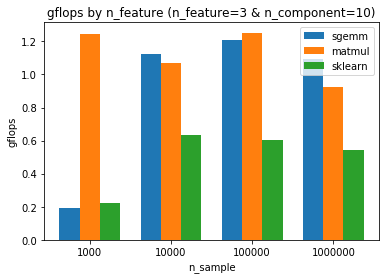

In [141]:
compare_sample(3, 10)

In [144]:
compils = ['gcc5', 'gcc5-avx2', 'gcc8', 'gcc8-avx2', 'icc18', 'icc18-avx2']
d3 = pd.read_csv('bench_pdist_compil.csv', header=None)
d10 = pd.read_csv('bench_pdist_compil_10.csv', header=None)
d50 = pd.read_csv('bench_pdist_compil_50.csv', header=None)
d100 = pd.read_csv('bench_pdist_compil_100.csv', header=None)

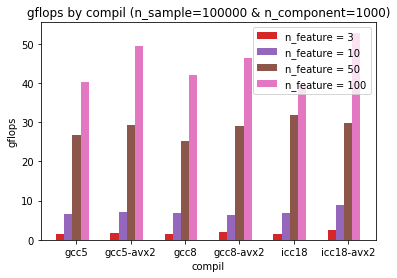

In [156]:
width = 0.15
d1 = np.array(d3[0])
ind1 = np.arange(len(d1)) -(2 * width)
p1 = plt.bar(ind1, d1, width)
d2 = np.array(d10[0])
ind2 = ind1 + width
p2 = plt.bar(ind2, d2, width)
d3 = np.array(d50[0])
ind3 = ind2 + width
p3 = plt.bar(ind3, d3, width)
d4 = np.array(d100[0])
ind4 = ind3 + width
p4 = plt.bar(ind4, d4, width)
    
plt.ylabel('gflops')
plt.xlabel('compil')
s = 'gflops by compil (n_sample=100000 & n_component=1000)'
plt.title(s)
plt.xticks(ind3, compils)
plt.legend((p1[0], p2[0], p3[0], p4[0]), ('n_feature = 3', 'n_feature = 10', 'n_feature = 50', 'n_feature = 100'))

plt.show()

In [159]:
funcs_avx = pd.read_csv('bench_p_dist_funcs_avx2.csv')

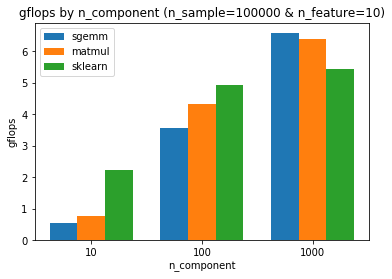

In [160]:
compare_component(funcs_avx, 100000, 10)

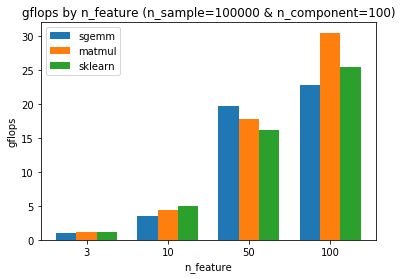

In [164]:
compare_feature(funcs_avx, 100000, 100)

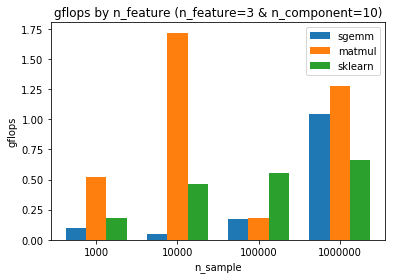

In [165]:
compare_sample(funcs_avx, 3, 10)